## ACTIVIDAD 1: REPASAR ALGORITMOS


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


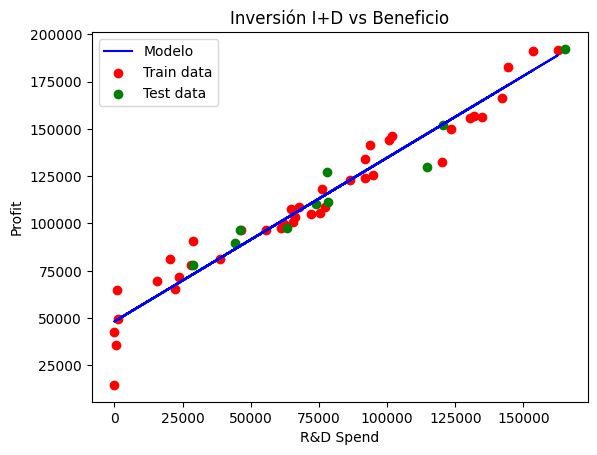

Train R2:  0.9466809150043461
Test R2:  0.9416151257997113


In [33]:
# Cargamos el dataset 50_startups
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('../datasets/50_Startups.csv')
print(data.head())
x = data['R&D Spend']
y = data['Profit']
seed = random.seed(123)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

# Creamos el modelo
model = LinearRegression()
x_train = x_train.values.reshape(-1, 1) 
model.fit(x_train, y_train)

# Creamos un scatter plot
import matplotlib.pyplot as plt
# Regresión lineal
plt.plot(x_train, model.predict(x_train), color='blue', label='Modelo')
plt.scatter(x_train, y_train, color='red', label='Train data')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.title('Inversión I+D vs Beneficio')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()

# Evaluamos el modelo
x_test = x_test.values.reshape(-1, 1)
y_pred = model.predict(x_test)

print("Train R2: ", model.score(x_train, y_train))
print("Test R2: ", model.score(x_test, y_test))

### Entrega 1:
- Capturas de ejecucion del codigo
- ¿Que significa en este caso que el R2 sea de 0.97? Que puede llegar a precedir con un 97% de acierto tanto los datos del dataset como nuevos


In [34]:
data = pd.read_csv('../datasets/50_Startups.csv')
predict_columns = ['R&D Spend','Marketing Spend', 'State']
target_column = 'Profit'
x = data[predict_columns]
y = data[target_column]
print(x.head())

# Convertimos la columna State en una columna numérica
x = pd.get_dummies(x, columns=['State'], dtype=int)

seed = random.seed(123)
# Dividimos el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

# Imprimimos los primeros registros de x_train, y_train, x_test, y_test
print("x_train primeros 5 registros")
print(x_train.head())
print("y_train primeros 5 registros")
print(y_train.head())

print("x_test primeros 5 registros")
print(x_test.head())
print("y_test primeros 5 registros")
print(y_test.head())

# Creamos el modelo
model = LinearRegression()
model.fit(x_train, y_train)

# Evaluamos el modelo
print("Train R2: ", model.score(x_train, y_train))
print("Test R2: ", model.score(x_test, y_test))


   R&D Spend  Marketing Spend       State
0  165349.20        471784.10    New York
1  162597.70        443898.53  California
2  153441.51        407934.54     Florida
3  144372.41        383199.62    New York
4  142107.34        366168.42     Florida
x_train primeros 5 registros
    R&D Spend  Marketing Spend  State_California  State_Florida  \
31   61136.38         88218.23                 0              0   
0   165349.20        471784.10                 0              0   
14  119943.24        256512.92                 0              1   
46    1315.46        297114.46                 0              1   
4   142107.34        366168.42                 0              1   

    State_New York  
31               1  
0                1  
14               0  
46               0  
4                0  
y_train primeros 5 registros
31     97483.56
0     192261.83
14    132602.65
46     49490.75
4     166187.94
Name: Profit, dtype: float64
x_test primeros 5 registros
    R&D Spend  Marketing

### ENTREGA 1: Muestra:
- Capturas de ejecución y el código.
- ¿Qué significa en este caso que el score sea aproximadamente del 0.966 en los datos de test?

Ahora mira los apuntes de la unidad y como se calcula el SSE, SST y SSR, R2 y R2 ajustado. 
Define 3 funciones de Python que calcule el el SSE, SST y SSR. Calcula e imprime sus valores para los datos de
train y test. Debes obtener:


In [35]:
def see_metric(y_predic, y_real):
  sse = np.square(y_predic - y_real.mean()).sum()
  return sse

def sst_metric(y_real):
  sst = np.square(y_real - y_real.mean()).sum()
  return sst

def ssr_metric(y_predic, y_real):
  ssr = np.square(y_predic - y_real).sum()
  return ssr

def r2_metric(sse, sst):
  return sse/sst

def r2_metric_ajustado(sse, sst, n, p):
  return 1 - ((1-sse/sst)*(n-1)/(n-p-1))

y_pred = model.predict(x_test)
sse_train = see_metric(model.predict(x_train), y_train)
sse_test = see_metric(y_pred, y_test)
print("SSE train: ", see_metric(model.predict(x_train), y_train))
print("SSE test: ", see_metric(y_pred, y_test))

sst_train = sst_metric(y_train)
sst_test = sst_metric(y_test)
print("SST train: ", sst_metric(y_train))
print("SST test: ", sst_metric(y_test))

print("SSR train: ", ssr_metric(model.predict(x_train), y_train))
print("SSR test: ", ssr_metric(y_pred, y_test))

r2_train = r2_metric(sse_train, sst_train)
r2_test = r2_metric(sse_test, sst_test)
print("R2 train: ", r2_train)
print("R2 test: ", r2_test)

print("R2 ajustado train: ", r2_metric_ajustado(see_metric(model.predict(x_train), y_train), sst_metric(y_train), x_train.shape[0], x_train.shape[1]))
print("R2 ajustado test: ", r2_metric_ajustado(see_metric(y_pred, y_test), sst_metric(y_test), x_test.shape[0], x_test.shape[1]))


SSE train:  73648134565.0138
SSE test:  2704425740.4908786
SST train:  77311263489.24994
SST test:  1441952992.8274896
SSR train:  3663128924.1490316
SSR test:  342685579.9169153
R2 train:  0.9526184315336471
R2 test:  1.8755297530107675
R2 ajustado train:  0.945650553818007
R2 ajustado test:  2.969941944274227


Ahora queremos saber si añadiendo la característica "Administration" (gastos de administración)
podríamos mejorar el modelo. Para ello volvemos a generar un array de numpy X con los datos de las
características "R&D Spend", "Administration", "Marqueting Spend" y "State" y en y los valores de
“profit”. volvemos a codificar la columna "State". Volvemos a particionar, crear y entrenar el modelo
de la misma manera que antes (para que use los mismos datos, inicializamos el proceso al mismo
valor aleatorio). Volvemos a imprimir el **score**:



In [36]:
predict_columns = ['R&D Spend','Marketing Spend', 'State', 'Administration']
target_column = 'Profit'

x = data[predict_columns]
y = data[target_column]

x = pd.get_dummies(x, columns=['State'], dtype=int)
seed = random.seed(123)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Evaluamos el modelo
print("Train R2: ", model.score(x_train, y_train))
print("Test R2: ", model.score(x_test, y_test))

Train R2:  0.9649385552805185
Test R2:  0.8206785392667189


ENTREGA 2: Muestra:
- Capturas de ejecución y el código.
- Haz una marca donde aumente el R2: [✅]Train [ ]Test
- Haz una marca donde aumente del R2 ajustado: [✅]Train [ ]Test
- ¿Dónde aparece mayor mejora? En el R2 o en el R2 ajustado: **En la metrica de R2**
- ¿Marca lo que calcula score() en scikit-learn? (_)SSE (_)SST (_)SSR (✅)R2 (_)R2 ajustado

In [37]:
from sklearn.neighbors import KNeighborsRegressor
predict_columns = ['R&D Spend','Marketing Spend', 'State']
target_column = 'Profit'

x = data[predict_columns]
y = data[target_column]

x = pd.get_dummies(x, columns=['State'], dtype=int)
seed = random.seed(123)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)
knn_model = KNeighborsRegressor(n_neighbors=3)


knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

# Evaluamos el modelo
print("Train R2: ", knn_model.score(x_train, y_train))

Train R2:  0.9016711387840659


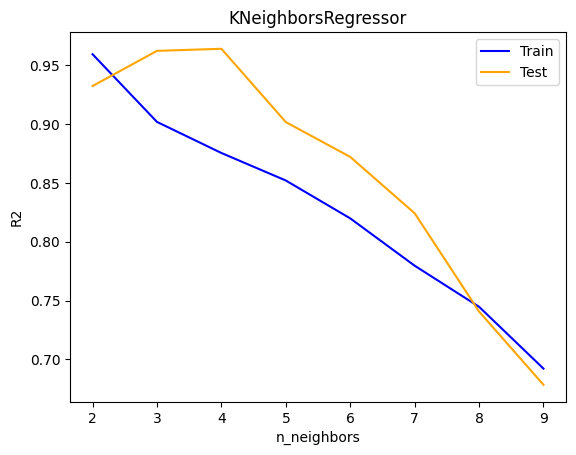

Mejor hiperparametro:  4


In [38]:
# Mejor hiperparametro de kneighbors 
train_score = {}
test_score = {}

k_neighbors = np.arange(2, 10)
for neighbor in k_neighbors:
  knn_model = KNeighborsRegressor(n_neighbors=neighbor)
  knn_model.fit(x_train, y_train)
  train_score[neighbor] = knn_model.score(x_train, y_train)
  test_score[neighbor] = knn_model.score(x_test, y_test)


# Graficamos los resultados
plt.plot(k_neighbors, train_score.values(), color='blue', label='Train')
plt.plot(k_neighbors, test_score.values(), color='orange', label='Test')
plt.title('KNeighborsRegressor')
plt.xlabel('n_neighbors')
plt.ylabel('R2')
plt.legend()
plt.show()

# Mejor hiperparametro de kneighbors
for key, value in test_score.items():
  if value == max(test_score.values()):
    print("Mejor hiperparametro: ", key)
    break

#### ENTREGA 3: Muestra:
- Capturas de ejecución y el código.
- Valor del hiperparámetro K que mejore el score alcanzado con K=3.

#### Actividad 2: Un caso real
Hay 3 tipos de características:
- La especificación de un automóvil en términos de diferentes características.
- Su calificación de riesgo de seguro asignada. Es un indicador del grado en que el
automóvil es más problemático de lo que indica su precio. Inicialmente, a los automóviles se
les asigna un símbolo de factor de riesgo asociado con su precio. Luego, si es más arriesgado (o
menos), este símbolo se ajusta moviéndolo hacia arriba (o hacia abajo) en la escala. Los
profesionales llaman a este proceso “symboling”. Un valor de 3 indica que el automóvil es
riesgoso y -3 que probablemente sea bastante seguro.
- El pago medio relativo por pérdida por año de vehículo asegurado. Este valor está
normalizado para todos los automóviles dentro de una clasificación de tamaño particular (twodoor small, station wagons, sports/speciality, etc…) y representa la pérdida promedio por
automóvil por año.

Hay que tener en cuenta que los valores ausentes están definidos con un “?”. Completa los siguientes
pasos en el fichero Python comenzando por:
- Cargar los datos en un Dataframe, (adapta la ruta al código de la siguiente figura).
- Mostrar los 5 primeros ejemplos por pantalla (completa y obtén mismos resultados).
- Muestra un resumen de las columnas del dataset (completa y obtén mismos resultados). 

In [39]:
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columnas = ['symboling', 'perdidas_normal', 'marca', 'combustible', 'inyección',
            'puertas', 'chasis', 'traccion', 'lugar_de_motor', 'potencia_base',
            'longitud', 'anchura', 'altura', 'peso', 'tipo_motor',
            'cilindros', 'tamaño_motor', 'sistema', 'calibre', 'ataque',
            'ratio_compresion', 'potencia_cv', 'max_rpm', 'consumo_carretera', 'consumo_ciudad',
            'precio']

autos = pd.read_csv("../datasets/seguros_de_coches.csv", header=None, names=columnas, na_values='?', delimiter=",")

# Imprimimos los primeros registros
print("Primeros 5 ejemplos")
print(autos.head())

Primeros 5 ejemplos
   symboling  perdidas_normal       marca combustible inyección puertas  \
0          3              NaN  alfa-romeo         gas       std     two   
1          3              NaN  alfa-romeo         gas       std     two   
2          1              NaN  alfa-romeo         gas       std     two   
3          2            164.0        audi         gas       std    four   
4          2            164.0        audi         gas       std    four   

        chasis traccion lugar_de_motor  potencia_base  ...  tamaño_motor  \
0  convertible      rwd          front           88.6  ...           130   
1  convertible      rwd          front           88.6  ...           130   
2    hatchback      rwd          front           94.5  ...           152   
3        sedan      fwd          front           99.8  ...           109   
4        sedan      4wd          front           99.4  ...           136   

   sistema  calibre  ataque ratio_compresion potencia_cv  max_rpm  \
0  

In [40]:
# Imprimimos tamaño del dataset
print("Tamaño del dataset")
print(autos.shape)

Tamaño del dataset
(201, 26)


In [41]:
# Imprimimos los tipos de datos
print("Tipos de datos")
print(autos.info())

Tipos de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   perdidas_normal    164 non-null    float64
 2   marca              201 non-null    object 
 3   combustible        201 non-null    object 
 4   inyección          201 non-null    object 
 5   puertas            199 non-null    object 
 6   chasis             201 non-null    object 
 7   traccion           201 non-null    object 
 8   lugar_de_motor     201 non-null    object 
 9   potencia_base      201 non-null    float64
 10  longitud           201 non-null    float64
 11  anchura            201 non-null    float64
 12  altura             201 non-null    float64
 13  peso               201 non-null    int64  
 14  tipo_motor         201 non-null    object 
 15  cilindros          201 non-null    object 
 16  tamaño_moto

In [42]:
# Valores ausentes y columnas categoricas
print("Valores ausentes")
print(autos.isna().sum())

cols_categoricas = ['marca', 'combustible', 'inyección', 'puertas', 'chasis', 'traccion', 'lugar_de_motor', 'tipo_motor', 'cilindros', 'sistema']
autos[cols_categoricas] = autos[cols_categoricas].astype('category')

autos['puertas'] = pd.Categorical(autos['puertas'], ordered=True, categories=['two', 'four'])
autos['cilindros'] = pd.Categorical(autos['cilindros'], ordered=True, categories=['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'])


Valores ausentes
symboling             0
perdidas_normal      37
marca                 0
combustible           0
inyección             0
puertas               2
chasis                0
traccion              0
lugar_de_motor        0
potencia_base         0
longitud              0
anchura               0
altura                0
peso                  0
tipo_motor            0
cilindros             0
tamaño_motor          0
sistema               0
calibre               4
ataque                4
ratio_compresion      0
potencia_cv           2
max_rpm               2
consumo_carretera     0
consumo_ciudad        0
precio                0
dtype: int64


In [43]:
# Imprimimos los tipos de datos
print("Tipos de datos")
print(autos.info())

Tipos de datos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   perdidas_normal    164 non-null    float64 
 2   marca              201 non-null    category
 3   combustible        201 non-null    category
 4   inyección          201 non-null    category
 5   puertas            199 non-null    category
 6   chasis             201 non-null    category
 7   traccion           201 non-null    category
 8   lugar_de_motor     201 non-null    category
 9   potencia_base      201 non-null    float64 
 10  longitud           201 non-null    float64 
 11  anchura            201 non-null    float64 
 12  altura             201 non-null    float64 
 13  peso               201 non-null    int64   
 14  tipo_motor         201 non-null    category
 15  cilindros          201 non-null    categor

In [44]:
# Analisis univariado de las variables categoricas
print("Analisis univariado de las variables categoricas")
cols_categoricas_escasas = ['marca', 'combustible', 'inyección', 'puertas', 'chasis', 'traccion', 'lugar_de_motor', 'tipo_motor', 'cilindros', 'sistema']
for col in cols_categoricas_escasas:
    print(autos[col].value_counts())
    print("")

Analisis univariado de las variables categoricas
marca
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romeo        3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

combustible
gas       181
diesel     20
Name: count, dtype: int64

inyección
std      165
turbo     36
Name: count, dtype: int64

puertas
four    113
two      86
Name: count, dtype: int64

chasis
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

traccion
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

lugar_de_motor
front    198
rear       3
Name: count, dtype: int64

tipo_motor
ohc      145
ohcf

In [45]:
cond_1 = "sistema in ['mfi', 'spfi']"
cond_2 = "cilindros in ['three', 'twelve']"
cond_3 = "marca == 'mercury'"
unir_a_train = autos.query(f"{cond_1} | {cond_2} | {cond_3}")

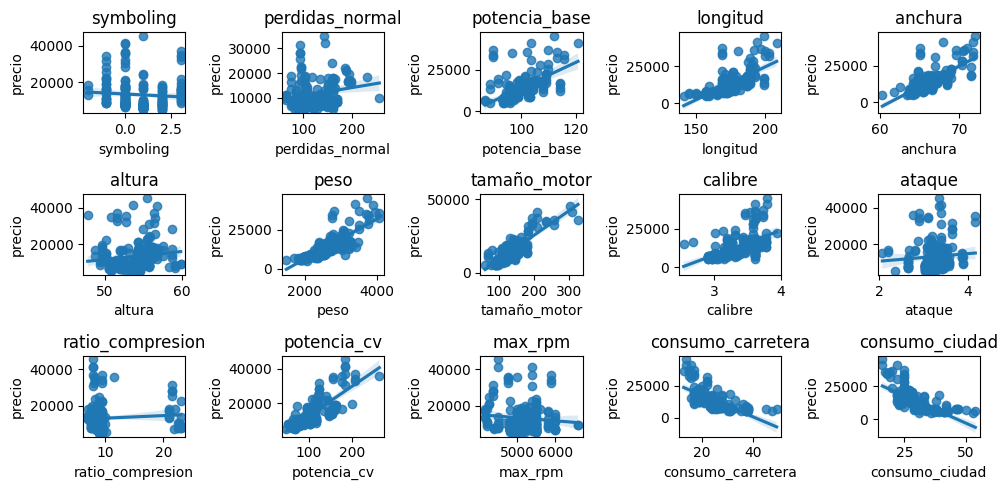

In [46]:
# Analisis bivariable 
# Generamos listado de variables numericas (excluyendo la variable target)
import seaborn as sns
import math

cols_numericas = autos.select_dtypes(include=['float64', 'int64']).columns
cols_numericas = cols_numericas.drop('precio')
n_cols_numericas = len(cols_numericas)

fig, ejes = plt.subplots(math.ceil(n_cols_numericas/5), 5, figsize=(10, 5))
ejes = ejes.flatten()

for i, col in enumerate(cols_numericas):
    sns.regplot(x=col, y='precio', data=autos, ax=ejes[i])
    ejes[i].set_title(f"{col}")
plt.tight_layout()
plt.show()

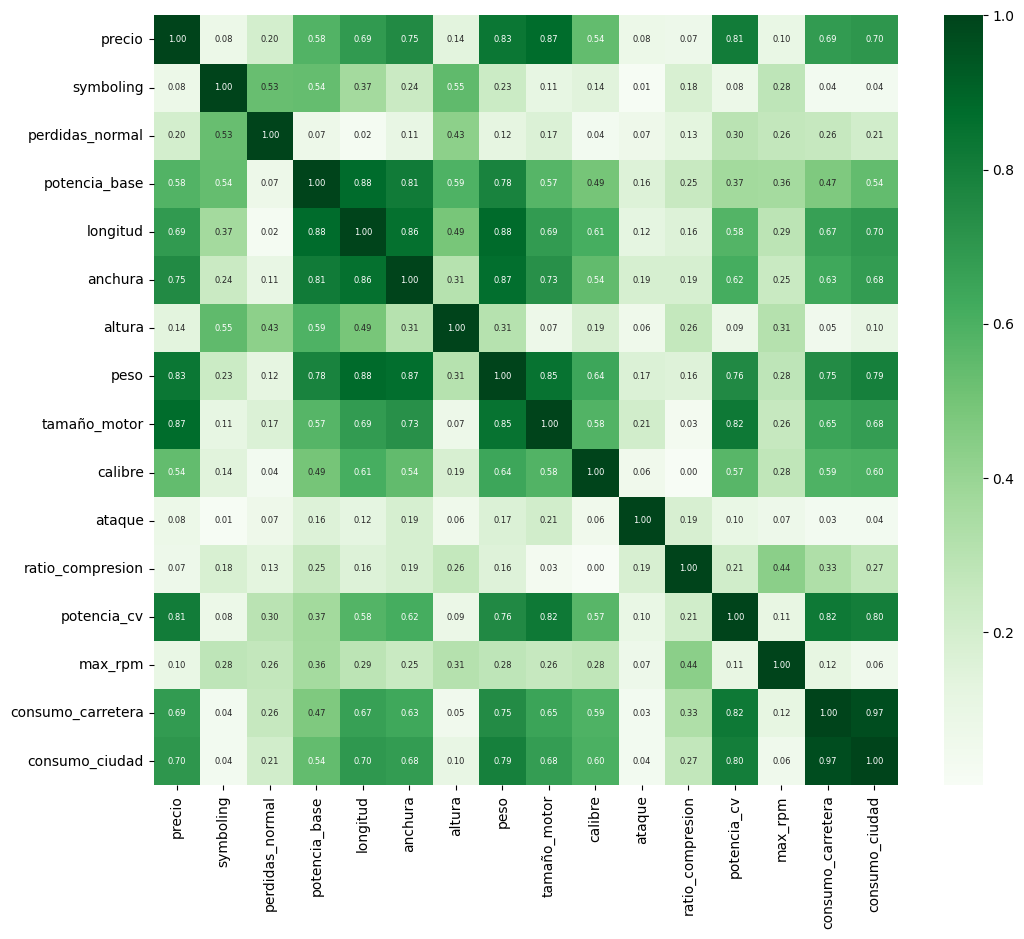

In [47]:
# Estudio de correlacion entre variables numericas
from matplotlib.colors import Colormap as cm
cols = autos.columns.tolist()
cols.insert(0, cols.pop(cols.index('precio')))
autos = autos.reindex(columns=cols)

autos_corr_matrix = autos.corr(numeric_only=True)
fig, ejes = plt.subplots(figsize=(12, 10))
absoluta = autos_corr_matrix.abs()
sns.heatmap(absoluta, annot=True, annot_kws={"size": 6}, fmt=".2f", cmap='Greens')
plt.show()

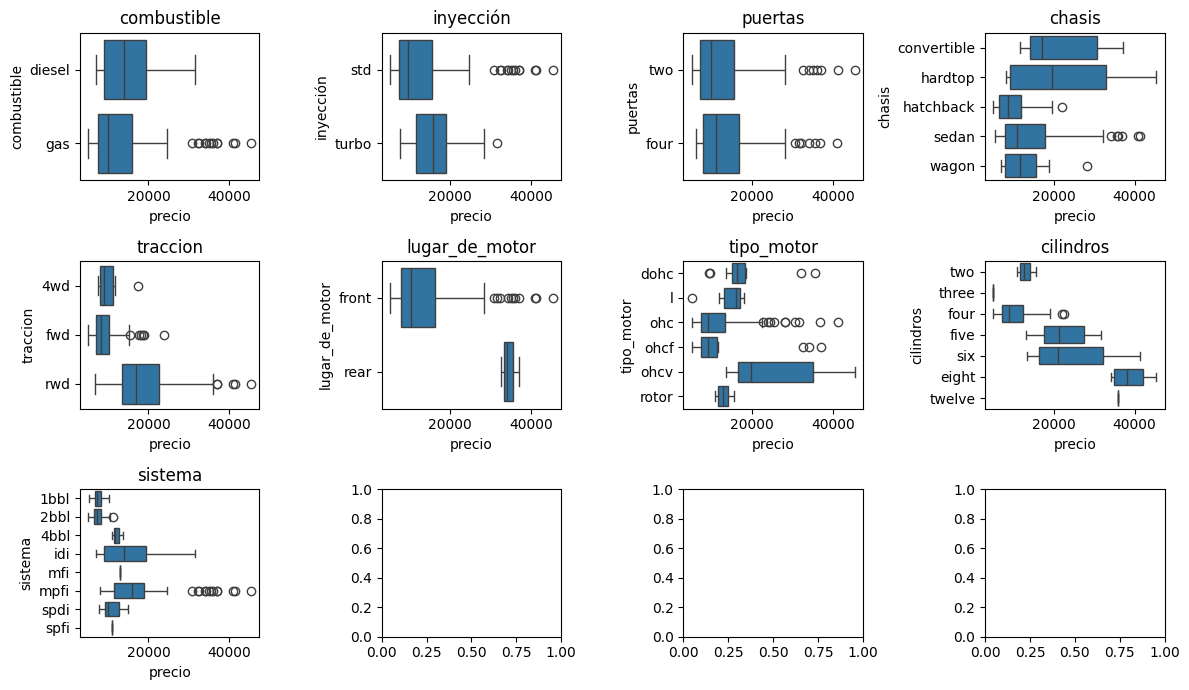

In [48]:
# Analisis de la Varianza (ANOVA) columnas categoricas
# Generamos listado de variables categoricas excepto columna marca
cols_categoricas = autos.select_dtypes(include=['category']).columns
cols_categoricas = cols_categoricas.drop('marca')
n_cat_cols = len(cols_categoricas)
fig, ejes = plt.subplots(n_cat_cols // 4 + 1, 4, figsize=(12, 7))
ejes = ejes.flatten()

for i, col in enumerate(cols_categoricas):
    sns.boxplot(x='precio', y=col, data=autos, ax=ejes[i])
    ejes[i].set_title(f"{col}")
plt.tight_layout()
plt.show()

FASE DE INGENIERÍA DE CARACTERÍSTICAS
Aplicamos una imputación simple sin hacer un análisis mas profundo de los datos. Las variables
numéricas se imputan con la media y las categóricas con la moda. Usamos pipelines de
transformación porque nos dan flexibilidad y nos van a ahorrar mucho trabajo a la larga:
• OneHotEncoder para las variables categóricas nominales.
• OrdinalEncoder para las variables categóricas ordinales

In [49]:
# Ingenieria de caracteristicas
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

y=autos['precio']
X=autos.drop('precio', axis=1)

# Distribuimos las columnas predictoras en 1 de estas categorias
cols_categoricas = ['marca', 'combustible', 'inyección', 'chasis', 'traccion', 'lugar_de_motor', 'tipo_motor', 'cilindros', 'sistema']
cols_categoricas_ordinales = ['puertas', 'cilindros']
cols_todas = X.columns.tolist()
cols_numericas = [x for x in cols_todas if x not in cols_categoricas and x not in cols_categoricas_ordinales]
print("Predictoras ordinales: ", cols_categoricas_ordinales)
print("Predictoras categoricas: ", cols_categoricas)
print("Predictoras numericas: ", cols_numericas)

# Creamos los pipelines
pipeline_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_categoricas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

pipeline_categoricas_ordinales = Pipeline(steps=[
    ('ordenc', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor_columns = ColumnTransformer(
    transformers=[
        ('numericas', pipeline_numericas, cols_numericas),
        ('categoricas', pipeline_categoricas, cols_categoricas),
        ('categoricas_ordinales', pipeline_categoricas_ordinales, cols_categoricas_ordinales)
    ]
)


Predictoras ordinales:  ['puertas', 'cilindros']
Predictoras categoricas:  ['marca', 'combustible', 'inyección', 'chasis', 'traccion', 'lugar_de_motor', 'tipo_motor', 'cilindros', 'sistema']
Predictoras numericas:  ['symboling', 'perdidas_normal', 'potencia_base', 'longitud', 'anchura', 'altura', 'peso', 'tamaño_motor', 'calibre', 'ataque', 'ratio_compresion', 'potencia_cv', 'max_rpm', 'consumo_carretera', 'consumo_ciudad']


In [50]:
preprocessor_columns

ColumnTransformer(transformers=[('numericas',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['symboling', 'perdidas_normal',
                                  'potencia_base', 'longitud', 'anchura',
                                  'altura', 'peso', 'tamaño_motor', 'calibre',
                                  'ataque', 'ratio_compresion', 'potencia_cv',
                                  'max_rpm', 'consumo_carretera',
                                  'consumo_ciudad']),
                                ('categoricas'...
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['marca', 'combustible', 'inyección', 'chasis',
                                  'traccion', 'lugar_de_motor', 'tipo_motor',
                                  'cilindros', 'sistema']),
                                ('categoricas_ordinales',
                                 Pipeline(steps=[('ordenc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=nan)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['puertas', 'cilindros'])])

In [51]:
# Comprobamos que el preprocesador funciona correctamente
# X_transformed = preprocessor_columns.fit_transform(X)
# print(X_transformed)

In [52]:
# Dividimos el dataset en train y test
from sklearn.model_selection import train_test_split
seed = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print("Tamaño de train: ", X_train.shape)
print("Tamaño de test: ", X_test.shape)

Tamaño de train:  (160, 25)
Tamaño de test:  (41, 25)


In [53]:
# Buscamos un buen modelo de regresion
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

dic_resultados = {}

def entrenar_modelos (modelo, procesador, X:pd.DataFrame, y:pd.Series, pct_test:float=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=pct_test, random_state=123)
    pipeline = Pipeline(steps=[
        ('preprocessor', procesador),
        ('model', modelo)
    ])
    modelo_entrenado = pipeline.fit(X_train, y_train)
    train_score = modelo_entrenado.score(X = X_train, y = y_train)
    test_score = modelo_entrenado.score(X = X_test, y = y_test)
    return {'train_score': train_score, 'test_score': test_score}


# Funcion para comparar los resultados de los modelos
def comparar_resultados(dic_resultados):
    for key, value in dic_resultados.items():
        print(f"Modelo: {key}")
        print(f"Train R2: {value['train_score']:10.6f}")
        print(f"Test R2: {value['test_score']:10.6f}")
        print("")

In [54]:
# Entrenamos los modelos
dic_resultados['Dummy'] = entrenar_modelos(DummyRegressor(strategy='median'), preprocessor_columns, X, y)
dic_resultados['Ridge'] = entrenar_modelos(Ridge(alpha=0.1), preprocessor_columns, X, y)
dic_resultados['Lasso'] = entrenar_modelos(Lasso(alpha=0.1), preprocessor_columns, X, y)
dic_resultados['ElasticNet'] = entrenar_modelos(ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, warm_start=True), preprocessor_columns, X, y)
dic_resultados['KNeighborsRegressor'] = entrenar_modelos(KNeighborsRegressor(n_neighbors=3), preprocessor_columns, X, y)

pipeline_poli = Pipeline([('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)), ('linear_regression', LinearRegression())])
dic_resultados['Polynomial'] = entrenar_modelos(pipeline_poli, preprocessor_columns, X, y)

comparar_resultados(dic_resultados)

Modelo: Dummy
Train R2:  -0.101031
Test R2:  -0.350897

Modelo: Ridge
Train R2:   0.973100
Test R2:   0.447197

Modelo: Lasso
Train R2:   0.974596
Test R2:   0.053218

Modelo: ElasticNet
Train R2:   0.940175
Test R2:   0.293632

Modelo: KNeighborsRegressor
Train R2:   0.957569
Test R2:   0.581930

Modelo: Polynomial
Train R2:   0.992116
Test R2: -178089781673831235059712.000000



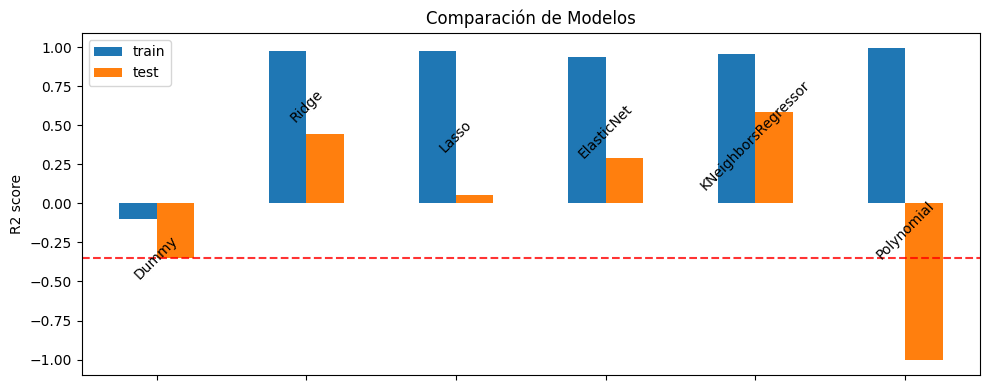

In [55]:
# Crear un diccionario solo con los resultados de prueba de cada modelo
nombre_modelos = dic_resultados.keys()
res_train = {} # crear diccionario vacio
res_test = {} # crear diccionario vacio
for nombre in nombre_modelos:
    res_train[nombre] = dic_resultados[nombre]['train_score']
    res_test[nombre] = dic_resultados[nombre]['test_score']
df_comparacion = pd.DataFrame([res_train, res_test], index=['train', 'test'])
df_comparacion = df_comparacion.clip(lower=-1, upper=1)
# Dibujar un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 4))
df_comparacion.T.plot(kind='bar', ax=ax)
ax.set_ylabel('R2 score')
ax.set_title('Comparación de Modelos')
ax.set_xticks(range(len(df_comparacion.columns)))
ax.set_xticklabels([])
# Dibujar etiquetas dentro de las barras rotadas 90 grados
for i, label in enumerate(df_comparacion.columns):
    bar_center = (df_comparacion.loc['train', label] + df_comparacion.loc['test', label]) / 2
    ax.text(i, bar_center, label, ha='center', va='center_baseline', rotation=45)
# Dibujar una línea del resultado del DummerRegressor
ax.axhline(df_comparacion['Dummy']['test'], color='red', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

#### - Validacion Cruzada

10-Fold Cross Validation de Regresion Lineal: -984839049721838884093952.000000 desviacion 2332627619611363103473664.000000
10-Fold Cross Validation de Ridge: 0.867074 desviacion 0.071855
10-Fold Cross Validation de Lasso: 0.811070 desviacion 0.133864
10-Fold Cross Validation de ElasticNet: 0.888540 desviacion 0.036680
10-Fold Cross Validation de Polynomial: -127948026649484118196224.000000 desviacion 215479494448828787982336.000000
10-Fold Cross Validation de KNeighborsRegressor: 0.796584 desviacion 0.093540


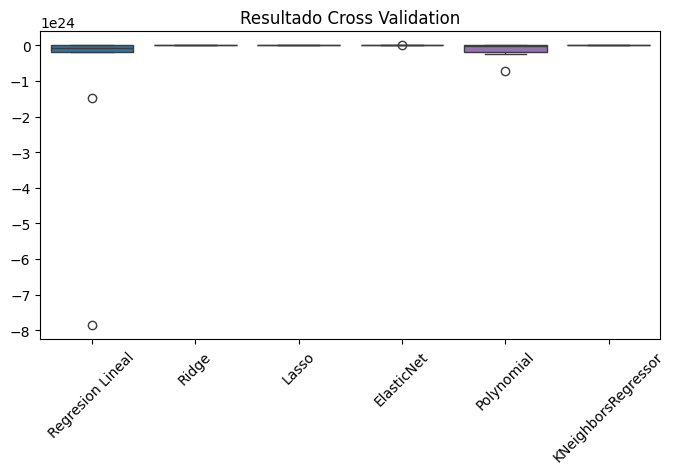

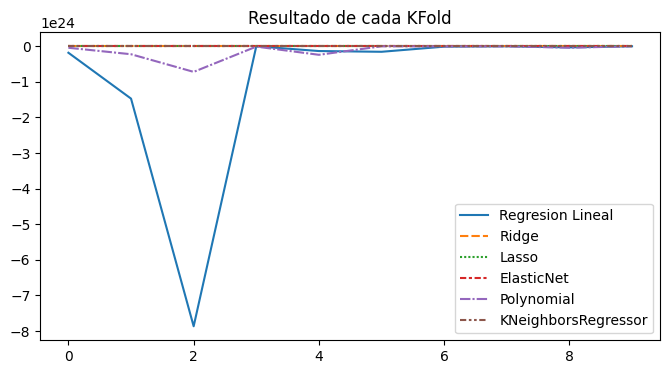

In [56]:
# lista para almacenar cada uno de los modelos seleccionados para realizar cross validation
modelos = []

# Añadir los modelos seleccionados a la lista
modelos.append(('Regresion Lineal', LinearRegression()))
modelos.append(('Ridge', Ridge(alpha=0.1)))
modelos.append(('Lasso', Lasso(alpha=0.1)))
modelos.append(('ElasticNet', ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, warm_start=True)))
modelos.append(('Polynomial', pipeline_poli))
modelos.append(('KNeighborsRegressor', KNeighborsRegressor(n_neighbors=5)))

# Definimos la estructura para realizar cross validation con 10 folds
from sklearn import model_selection
seed = 123
resultados = []
nombres = []

for n, m in modelos:
    kfold = model_selection.KFold(n_splits=10)
    modelo_pipeline = Pipeline(steps=[('preprocessor', preprocessor_columns), ('model', m)])
    cv_results = model_selection.cross_val_score(estimator=modelo_pipeline, X=X_train, y=y_train, cv=kfold, scoring='r2')
    resultados.append(cv_results)
    nombres.append(n)
    mensaje = f"10-Fold Cross Validation de {n}: {cv_results.mean():.6f} desviacion {cv_results.std():.6f}"
    print(mensaje)

# Graficamos los resultados
plt.figure(figsize=(8,4))
result_df = pd.DataFrame(resultados, index=nombres).T
sns.boxplot(data=result_df)
plt.xticks(rotation=45)
plt.title("Resultado Cross Validation")
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(data=result_df)
plt.title("Resultado de cada KFold")
plt.show()



In [57]:
# Comparacion Estadistica de los modelos 
# Para ello utilizamos un test ANOVA de un solo factor
from scipy.stats import f_oneway

model1 = result_df['Regresion Lineal']
model2 = result_df['Ridge']
model3 = result_df['Lasso']
model4 = result_df['ElasticNet']
model5 = result_df['Polynomial']
model6 = result_df['KNeighborsRegressor']

estadistico, p_value = f_oneway(model1, model2, model3, model4, model5, model6) # Anova de un solo factor
print(f"Estadistico: {estadistico:.6f}")
print(f"p-value: {p_value:.6f}")

# Un test de contraste de hipotesis para determinar si los modelos son iguales
alfa = 0.05 # nivel de significancia
if p_value < alfa:
    print("Existe una diferencia estadisticamente significativa entre los resultados de cross-validation de los modelos")
else:
    print("No existe una diferencia estadisticamente significativa entre los resultados de cross-validation de los modelos")

Estadistico: 1.534898
p-value: 0.194485
No existe una diferencia estadisticamente significativa entre los resultados de cross-validation de los modelos


In [58]:
#Tunning de hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Tunning con Lasso
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor_columns), ('model', Lasso())])
parametros = {'model__alpha': [0.01, 0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(estimator=lasso_pipeline, param_grid=parametros, cv=5, return_train_score=True, scoring='r2')
grid_search.fit(X_train, y_train)
print("Mejor resultado: ", grid_search.best_score_)
print("Mejores parametros: ", grid_search.best_params_)
print("Mejor std: ", grid_search.cv_results_['std_test_score'][grid_search.best_index_])

# Tunning con KNN
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor_columns), ('model', KNeighborsRegressor())])
parametros = {'model__n_neighbors': [5, 10, 12, 14, 18, 20, 25, 30, 35, 50]}
grid_search1 = GridSearchCV(estimator=knn_pipeline, param_grid=parametros, cv=5, return_train_score=True, scoring='r2')
grid_search1.fit(X_train, y_train)
print("Mejor resultado: ", grid_search1.best_score_)
print("Mejores parametros: ", grid_search1.best_params_)
print("Mejor std: ", grid_search1.cv_results_['std_test_score'][grid_search1.best_index_])

Mejor resultado:  0.8537756687981262
Mejores parametros:  {'model__alpha': 1}
Mejor std:  0.07537207200952316
Mejor resultado:  0.8081903025642315
Mejores parametros:  {'model__n_neighbors': 5}
Mejor std:  0.05141686038979572


In [59]:
# Entrenamos el modelo con los mejores hiperparametros
# Suponiendo que haya sido KNNeighborsRegressor
from sklearn import metrics
knn_model = KNeighborsRegressor(n_neighbors=grid_search1.best_params_['n_neighbors'])
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("R2: ", metrics.r2_score(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Libreria de serializacion
from joblib import dump
dump(knn_model, 'knn_model.joblib')

# Cargamos el modelo
from joblib import load
knn_model = load('knn_model.joblib')
datos_prueba = X_test[:1]
print("Prediccion" , knn_model.predict(datos_prueba))

KeyError: 'n_neighbors'

In [ ]:
#------- Entrenar, medir y Guardar el modelo ganador
#--- Suponiendo que haya sido el KNN

from sklearn import metrics
knn_pipe = Pipeline(steps=[("preprocessor", preprocessor_columns),
                                 ("model", KNeighborsRegressor(n_neighbors=gs1.best_params_['model__n_neighbors']))])

knn_pipe.fit(x_train, y_train)
y_pred = knn_pipe.predict(x_test)
print("R2:", metrics.r2_score(y_true=y_test, y_pred=y_pred))

from sklearn.metrics import PredictionErrorDisplay
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="actual_vs_predicted")
plt.show()
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred, kind="residual_vs_predicted")
plt.show()
from sklearn.inspection import permutation_importance

imps = permutation_importance(knn_pipe, x_test, y_test, n_repeats=5, scoring="r2", n_jobs=-1, random_state=123)
fig = plt.figure(figsize=(10, 8))

perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False, labels=x_test.columns[perm_sorted_idx])

plt.title("Importancias Permutaciones (datos de test)")
plt.show()

In [ ]:
from joblib import dump
dump(knn_pipe, 'knn_pipe.joblib')

# Cargamos el modelo
from joblib import load
knn_pipe = load('knn_pipe.joblib')
datos_prueba = x_test[:1]
print("Prediccion" , knn_pipe.predict(datos_prueba))